## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## Leer datos 

In [2]:
df = pd.read_csv('../../data/3117033.csv', delimiter=',', index_col=['DATE'], 
                 parse_dates=['DATE'])
df = df.loc['1975':'2020'] 
df

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1975-01-01,PEM00084691,"PISCO INTERNATIONAL, PE",0.0,22.8,NaN,19.0
1975-01-02,PEM00084691,"PISCO INTERNATIONAL, PE",0.0,21.1,27.0,19.0
1975-01-03,PEM00084691,"PISCO INTERNATIONAL, PE",NaN,22.1,NaN,NaN
1975-01-04,PEM00084691,"PISCO INTERNATIONAL, PE",0.0,20.4,26.0,17.0
1975-01-05,PEM00084691,"PISCO INTERNATIONAL, PE",0.0,20.8,26.0,16.0
...,...,...,...,...,...,...
2020-12-27,PEM00084691,"PISCO INTERNATIONAL, PE",NaN,21.5,NaN,18.9
2020-12-28,PEM00084691,"PISCO INTERNATIONAL, PE",NaN,21.2,NaN,19.8
2020-12-29,PEM00084691,"PISCO INTERNATIONAL, PE",NaN,21.4,NaN,NaN


## Figuras series temporales

Ahora vamos usar **matplotlib** para generar figuras de series de tiempo.

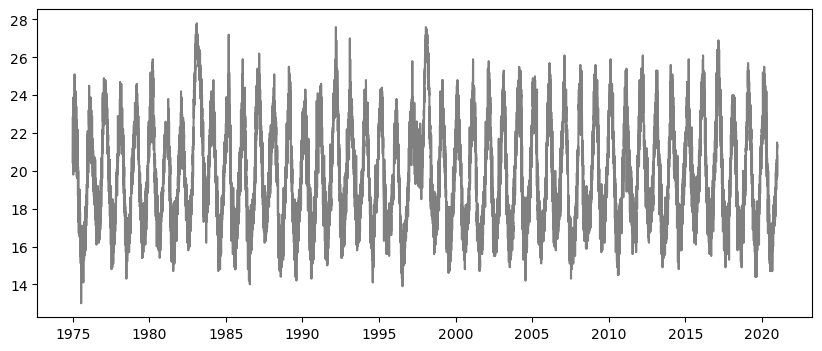

In [3]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.plot(df['TAVG'], '-', c='gray')

Esta es la forma más básica de generar una figura. 

Ahora vamos usar **`geocat.viz`** para darle algunos ajustes a nuestra figura.

In [4]:
import geocat.viz as gv

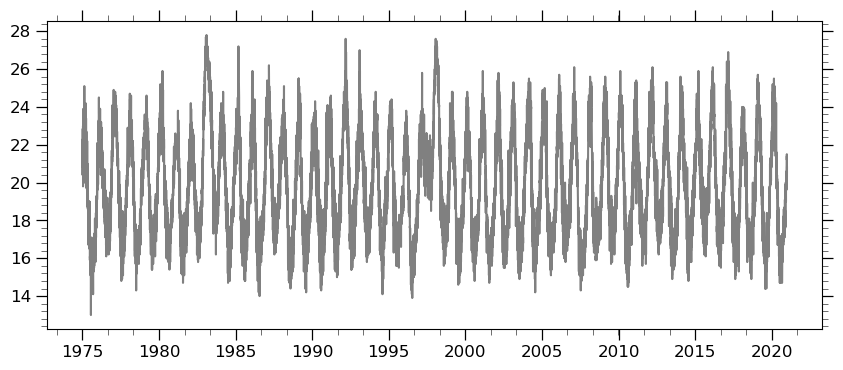

In [5]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.plot(df['TAVG'], '-', c='gray')

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=3,
                         y_minor_per_major=5,
                         labelsize=12)

Podemos ajustar los ejes x y y usando **`geocat.viz.util`**.

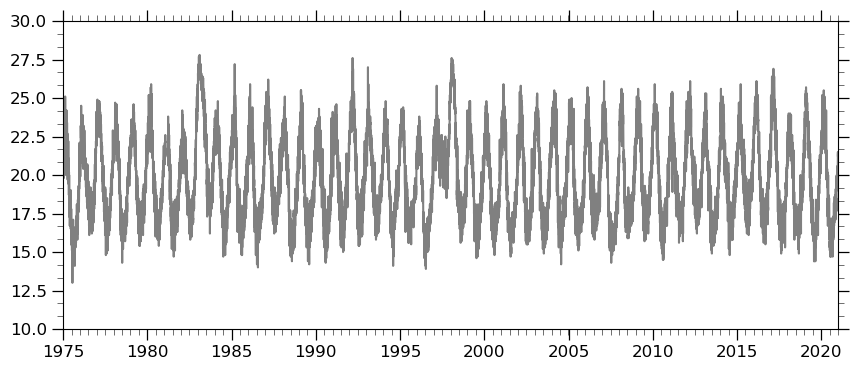

In [6]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.plot(df['TAVG'], '-', c='gray')

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=10,
                         y_minor_per_major=3,
                         labelsize=12)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(10, 30),
    xlim=(datetime(1975,1,1), datetime(2020,12,31))) # Ten en cuenta que el eje x está en formato tiempo.

Ya tenemos nuestra figura con las configuraciones básicas. Ahora podemos agregar el título para el eje **y**.

Text(0, 0.5, 'Temperatura (°C)')

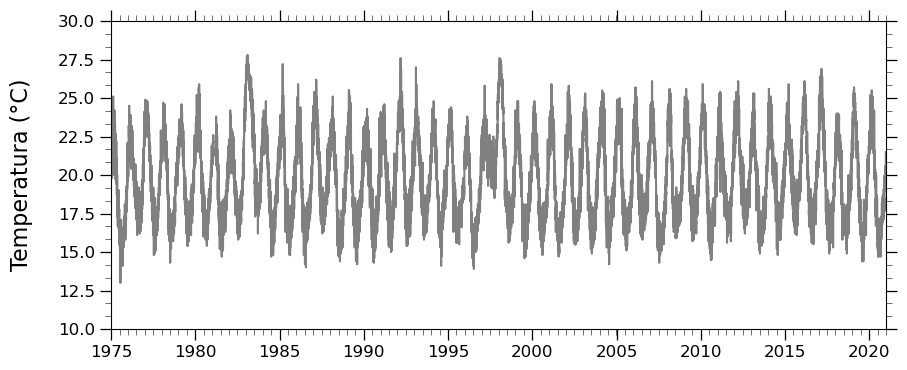

In [7]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.plot(df['TAVG'], '-', c='gray')

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=10,
                         y_minor_per_major=3,
                         labelsize=12)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(10, 30),
    xlim=(datetime(1975,1,1), datetime(2020,12,31))) # Ten en cuenta que el eje x está en formato tiempo.

# agregar el título para el eje y. Además, damos algunos ajustes.
ax.set_ylabel('Temperatura (°C)', labelpad=18, fontsize=16)

Ya hemos generado nuestra figura de temperatura promedio diaria, ahora queremos hacer una figura mensualmente.

### Promedio y suma mensual

Primero debemos promediar las temperaturas y sumar las precipitaciones por meses. Para ello, usamos nuestra función mejorada que vimos en la clase pasada.

In [8]:
# Función mejorada para sumar columnas donde contienen nan's
def nansumwrapper(a, **kwargs):
    if np.isnan(a).all():
        return np.nan
    else:
        return np.nansum(a, **kwargs)

In [9]:
df_sub = df.resample('1M').agg({'PRCP':nansumwrapper, 'TAVG':np.mean, 'TMIN':np.mean, 'TMAX':np.mean})
df_sub

,PRCP,TAVG,TMIN,TMAX
DATE,,,,
1975-01-31,0.0,21.472727,18.285714,26.000000
1975-02-28,NaN,22.421429,18.900000,26.937500
1975-03-31,NaN,22.355172,19.312500,27.277778
1975-04-30,NaN,21.080000,17.526316,25.722222
1975-05-31,NaN,18.630000,15.250000,22.916667
...,...,...,...,...
2020-08-31,NaN,16.138710,12.967857,NaN
2020-09-30,NaN,16.453333,12.978947,19.150000
2020-10-31,NaN,17.716129,14.859091,21.892308


Ahora estamos listos para generar nuestra figura mensual. Pero esta vez vamos a usar una forma diferentes **`subplots`**.

Text(0, 0.5, 'Temp (°C)')

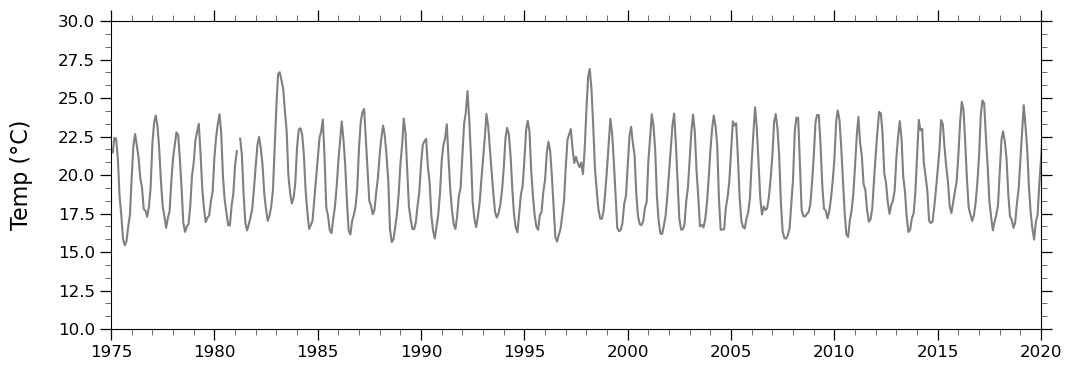

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 4))

ax1.plot(df_sub['TAVG'], '-', c='gray')

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax1,
                         x_minor_per_major=5,
                         y_minor_per_major=3,
                         labelsize=12)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax1,
    ylim=(10, 30),
    xlim=(datetime(1975,1,1), datetime(2020,1,1)))

# agregar el título para el eje y. Además, damos algunos ajustes.
ax1.set_ylabel('Temp (°C)', labelpad=18, fontsize=16)


Entonces hemos generado nuestra figura mensual de la temperatura. Pero tal vez queremos agregar más información. Esta vez vamos agregar información de **ENSO**.

### Importando datos internet

Vamos a importar datos desde la [NOAA](https://www.cpc.ncep.noaa.gov/data/indices/). Estos datos son anomalías de la temperatura superficial del océano pacifico para la regiones de [ENSO](https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.81-10.ascii). 

Vamos usar el argumento **`engine`**. Esto es nuevo para nosotros. **`engine`** va analizar las características de la estructura del archivo que estamos leyendo.

In [11]:
## ENSO

path = 'https://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.81-10.ascii'
df1 = pd.read_csv(path, sep=' +', engine='python')
df1


,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1950,1,23.01,-1.53,23.56,-2.11,26.94,-1.30,24.55,-2.00
1,1950,2,24.32,-1.70,24.89,-1.52,26.67,-1.43,25.06,-1.68
2,1950,3,25.11,-1.31,26.36,-0.80,26.52,-1.68,25.87,-1.37
3,1950,4,23.63,-1.83,26.44,-1.04,26.90,-1.55,26.28,-1.43
4,1950,5,22.68,-1.59,25.69,-1.47,27.73,-1.01,26.18,-1.63
...,...,...,...,...,...,...,...,...,...,...
847,2020,8,19.96,-1.05,24.50,-0.60,28.48,-0.17,26.27,-0.57
848,2020,9,19.50,-1.23,23.91,-1.02,28.21,-0.45,25.89,-0.84
849,2020,10,20.25,-0.80,23.85,-1.10,27.96,-0.68,25.46,-1.21
850,2020,11,20.95,-0.75,23.89,-1.15,27.81,-0.75,25.29,-1.33


En el dataframe el año y el mes están separadas. Sabemos que los datos están a una frecuencia mensual. Una forma de construir la columna tiempo es usar la función **`pd.data_range`**. Necesitamos indicarle el tiempo inicial, el número de elementos y la frecuencia.

In [12]:
time = pd.date_range(pd.datetime(1950, 1, 1),
                     periods=len(df1.index),
                     freq='MS')


/tmp/ipykernel_11533/3186448884.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  time = pd.date_range(pd.datetime(1950, 1, 1),


El mensaje que salió no es un error, es una advertencia.

Ahora vamos a seleccionar las columnas de nuestro interés y renombrarlas.

In [13]:
df1 = df1[['ANOM', 'ANOM.3']]
df1.columns = ['NINO1.2', 'NINO3.4']

Vamos a aplicar una media móvil para suavizar los datos. Esto se hace usando la función **`pd.rolling`**. Necesitamos ingresar la ventana, en caso que queramos conservar los datos iniciales y finales True y un mínimo de periodos. Además vamos a colocar en el index la variable tiempo que creamos antes.

In [14]:
window = 5
dfm = df1.rolling(window=window, center=True, min_periods=1).mean()
df1 = dfm.set_index(time)
df1

,NINO1.2,NINO3.4
1950-01-01,-1.513333,-1.683333
1950-02-01,-1.592500,-1.620000
1950-03-01,-1.592000,-1.622000
1950-04-01,-1.622000,-1.448000
1950-05-01,-1.606000,-1.290000
...,...,...
2020-08-01,-0.982000,-0.602000
2020-09-01,-1.016000,-0.828000
2020-10-01,-0.938000,-1.018000
2020-11-01,-0.910000,-1.130000


Veamos la tabla impresa.

Ahora vamos a seleccionar desde 1975 hasta el 2020. y renombrar el nobre de la columna.

In [15]:
df1 = df1[['NINO3.4', 'NINO1.2']].loc['1975':'2020'].copy()
df1.columns = ['sst', 'NINO1.2']
df1

,sst,NINO1.2
1975-01-01,-0.828000,-1.014000
1975-02-01,-0.794000,-0.794000
1975-03-01,-0.808000,-0.648000
1975-04-01,-0.988000,-0.684000
1975-05-01,-1.110000,-0.644000
...,...,...
2020-08-01,-0.602000,-0.982000
2020-09-01,-0.828000,-1.016000
2020-10-01,-1.018000,-0.938000
2020-11-01,-1.130000,-0.910000


Veamos la tabla impresa.

In [16]:
from scipy.ndimage.measurements import label as label_region
from scipy.ndimage.measurements import find_objects

/tmp/ipykernel_11533/375969915.py:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label as label_region
/tmp/ipykernel_11533/375969915.py:2: DeprecationWarning: Please use `find_objects` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import find_objects


El mensaje que salió no es un error, es una advertencia.

Usamos:

* **`label_region`**: Etiqueta características en una matriz.
* **`enumerate`**: toma un argumento de inicio iterable y opcional.
* **`find_objects`**: Encuentra objetos en una matriz etiquetada.

Vamos a utilizar 0.5 umbral para identificar que meses fueron niño y niña.

In [17]:
thres = 0.5

Con la función label generamos una un vector con etiquetas.

In [18]:
r, nr = label_region(df1['sst'] > thres)

Veamos que nos devuelve.

In [19]:
print(r)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3
  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  5  5  5  5  5  5  5  5  5  5  5  5  5  0  0  0  0  0  0
  0  0  6  6  6  6  0  0  0  0  0  0  0  0  0  0  0  0  0  7  7  7  7  7
  7  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  8  8  8  8  8  8  8  8  8  8  8  8  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [20]:
nr = [i+1 for i, o in enumerate(find_objects(r)) if (len(r[o]) >= 6)]
print(nr)

[3, 4, 5, 7, 8, 9, 10, 12, 13, 14]


In [21]:
is_nino = [ri in nr for ri in r]
print(is_nino[0:20])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Hagamos lo mismo para identificar periodos de La Niña.

In [22]:
r, nr = label_region(df1['sst'] < (-thres))
nr = [i+1 for i, o in enumerate(find_objects(r)) if (len(r[o]) >= 6)]
is_nina = [ri in nr for ri in r]
print(is_nino[0:20])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Ahora vamos agregar las columnas a nuestro **`dataframe`**.

In [23]:
df1['is_nina'] = is_nina
df1['is_nino'] = is_nino
df1['is_neutral'] = ~(df1['is_nina'] | df1['is_nino']) # condición además aumentativa 
df1

,sst,NINO1.2,is_nina,is_nino,is_neutral
1975-01-01,-0.828000,-1.014000,True,False,False
1975-02-01,-0.794000,-0.794000,True,False,False
1975-03-01,-0.808000,-0.648000,True,False,False
1975-04-01,-0.988000,-0.684000,True,False,False
1975-05-01,-1.110000,-0.644000,True,False,False
...,...,...,...,...,...
2020-08-01,-0.602000,-0.982000,False,False,True
2020-09-01,-0.828000,-1.016000,False,False,True
2020-10-01,-1.018000,-0.938000,False,False,True
2020-11-01,-1.130000,-0.910000,False,False,True


Cuando hacemos este tipo de figuras es mejor trabajar con valores numéricos en el eje x. Entonces vamos a generar un vector con el mismo número de filas de nuestro **`dataframe`**. 

In [24]:
nx = len(df1['sst'])
xtime = np.arange(nx)
print(xtime[0:20])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Básicamente la variable **xtime** contiene números desde 0 hasta el mismo número de filas de nuestro dataframe. Usaremos esta variable para interpolar y hacer la figura después.

Por ejemplo, vamos a interpolar el número de las columnas que contienen la información de El Niño y La Niña.
Primero 

Primero creamos un vector con **n** filas. Usaremos **`np.linspace`**. Los argumentos que debemos dar son un número inicial, un número final y un número de cuantos elementos. Luego usamos **`np.interp`** para interpolar. 

In [25]:
tspans = np.linspace(0, nx, nx*2+1)
isnino = np.interp(tspans, xtime, df1['is_nino'].values.astype(float)) != 0
isnina = np.interp(tspans, xtime, df1['is_nina'].values.astype(float)) != 0
print(isnino)
print(isnina)

[False False False ... False False False]
[ True  True  True ... False False False]


Veamos que paso. 

In [26]:
print(len(tspans))
print(len(isnino))

1105
1105


Como estamos usando un vector con formato numérico que irá en el eje x para las figuras, debemos generar un vector que localize a que número corresponde el año y mes.

In [27]:
majorTickNames = np.arange(10)*5 + 1975
print(majorTickNames)
majorTickPos = np.array([])
for y in majorTickNames:
    majorTickPos = np.append(majorTickPos, np.where((df1.index.month == 1) &
                                                    (df1.index.year == y))[0])
print(majorTickPos)


[1975 1980 1985 1990 1995 2000 2005 2010 2015 2020]
[  0.  60. 120. 180. 240. 300. 360. 420. 480. 540.]


Veamos que paso.

Ahora ya están listos para generar nuestra figura. Esta vez vamos a agregar subfiguras.

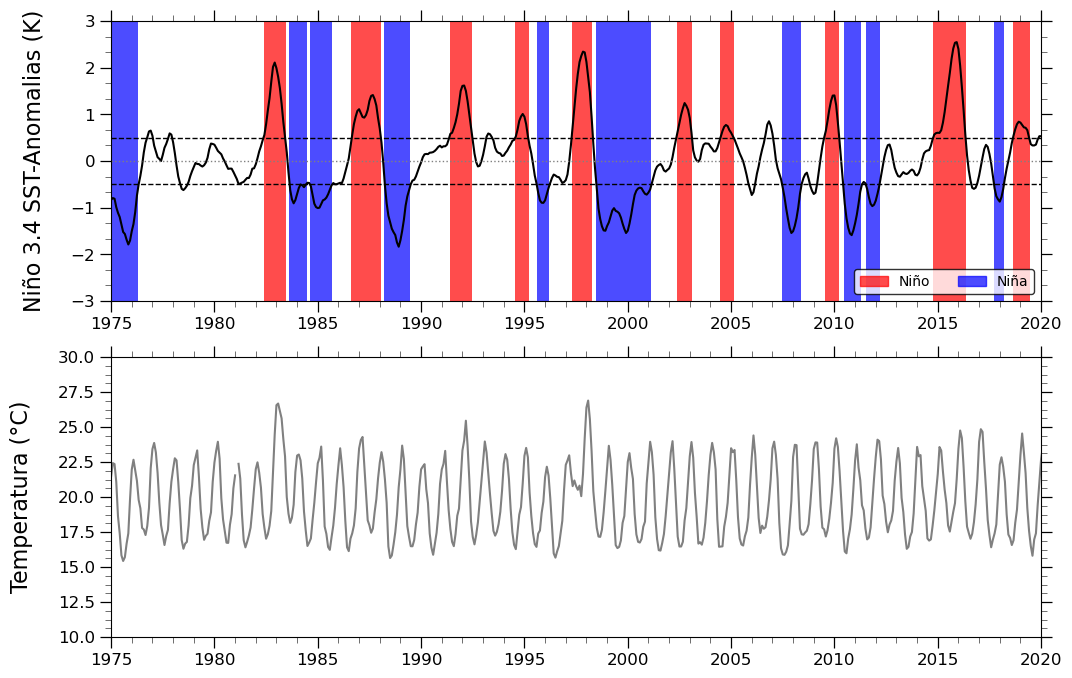

In [28]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(211)

plt.plot(xtime, df1['sst'].values, '-', c='k')

# Ajustar las etiquetas en tiempo
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_ticks(majorTickPos)
ax.set_xticklabels(majorTickNames)

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=5,
                         y_minor_per_major=3,
                         labelsize=12)


# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(-3.0, 3.0),
    xlim=[0, majorTickPos[-1]])

# Vamos agregar las barras verticales que nos indican que años fueron El Niño y La Niña
# Una forma de hacer esto es usando collections de matplolib 
import matplotlib.collections as collections
span_where = collections.BrokenBarHCollection.span_where
c = span_where(tspans, ymin=-3.0, ymax=3.0, where=isnino, color='r', alpha=0.7, linewidths=0)
ax.add_collection(c)
c = span_where(tspans, ymin=-3.0, ymax=3.0, where=isnina, color='b', alpha=0.7, linewidths=0)
ax.add_collection(c)

# agregar el título para el eje y. Además, damos algunos ajustes.
ax.set_ylabel('Niño 3.4 SST-Anomalias (K)', labelpad=18, fontsize=16)

# Podemos agregar líneas horizontales a nuestra figura
ax.axhline(0, linewidth=1, color='grey', linestyle =':')
ax.axhline(0.5, linewidth=1, color='k', linestyle ='--')
ax.axhline(-0.5, linewidth=1, color='k', linestyle ='--')

# Ahora vamos a agregar la leyenda
import matplotlib.patches as mpatches
pat1 = mpatches.Patch(color='r', alpha=0.7, label=u'Niño')
pat2 = mpatches.Patch(color='b', alpha=0.7, label=u'Niña')

# Vamos a configurar nuestra leyenda 
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'
legend = plt.legend(handles=[pat1,pat2], loc='lower right', ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)

# subplot 2
ax = fig.add_subplot(212)

plt.plot(xtime, df_sub['TAVG'].values, '-', c='gray')

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=5,
                         y_minor_per_major=3,
                         labelsize=12)

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_ticks(majorTickPos)
ax.set_xticklabels(majorTickNames)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(10, 30),
    xlim=[0, majorTickPos[-1]])

# agregar el título para el eje y. Además, damos algunos ajustes.
ax.set_ylabel('Temperatura (°C)', labelpad=18, fontsize=16)

# Guardamos nuestra figura
fig.savefig('fig/ENSO_TAVG_1975-2020.png', dpi = 200, facecolor='w')

### Figura de barras

In [29]:
df.columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

Usamos la función **`plt.bar`** para generar gráficos de barras. Recuerda que es mejor trabajar con formato numérico en el eje x. Vamos aprovechar la variable xtime que declaramos antes. 

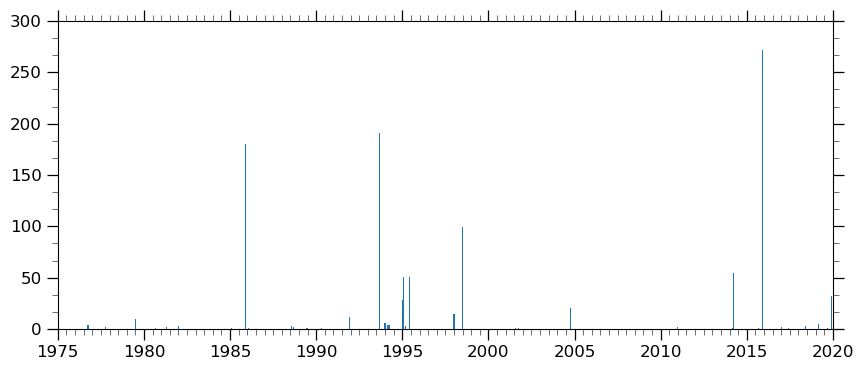

In [30]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.bar(xtime, df_sub['PRCP'].values)

# Ajustar las etiquetas en tiempo
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_ticks(majorTickPos)
ax.set_xticklabels(majorTickNames)

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=10,
                         y_minor_per_major=3,
                         labelsize=12)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(0, 300),
    xlim=(0, majorTickPos[-1]))


Vemos en la figura que hay valores muy altos en algunos. Es importante saber si esto está bien. Ahora vamos a hacer una figura del acumulado de la precipitación anual.

In [31]:
df_year = df_sub.resample('1Y').agg({'PRCP':nansumwrapper, 'TAVG':np.mean, 'TMIN':np.mean, 'TMAX':np.mean})
df_year.head()

,PRCP,TAVG,TMIN,TMAX
DATE,,,,
1975-12-31,0.0,18.688573,15.222746,23.214613
1976-12-31,4.1,19.887852,16.609505,24.614513
1977-12-31,2.0,19.931128,16.718970,24.316258
1978-12-31,0.0,19.411578,15.922496,23.922616
1979-12-31,9.9,19.720778,16.192679,24.209159


Cuando hacemos este tipo de figuras es mejor trabajar con valores numéricos en el eje x. Entonces vamos a generar un vector con el mismo número de filas de nuestro **`dataframe`**. 

In [32]:
nx = len(df_year)
xtime = np.arange(nx)
xtime

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Como estamos usando un vector con formato numérico que irá en el eje x para las figuras, debemos generar un vector que localize a que número corresponde el año y mes.

In [33]:
majorTickNames = np.arange(10)*5 + 1975
majorTickPos = np.array([])
for y in majorTickNames:
    majorTickPos = np.append(majorTickPos, np.where((df_year.index.month == 12) &
                                                    (df_year.index.year == y))[0])
print(majorTickPos)
print(majorTickNames)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]
[1975 1980 1985 1990 1995 2000 2005 2010 2015 2020]


Ahora estamos listos para hacer nuestra figura de barras.

Text(0, 0.5, 'Precipitación (mm/año)')

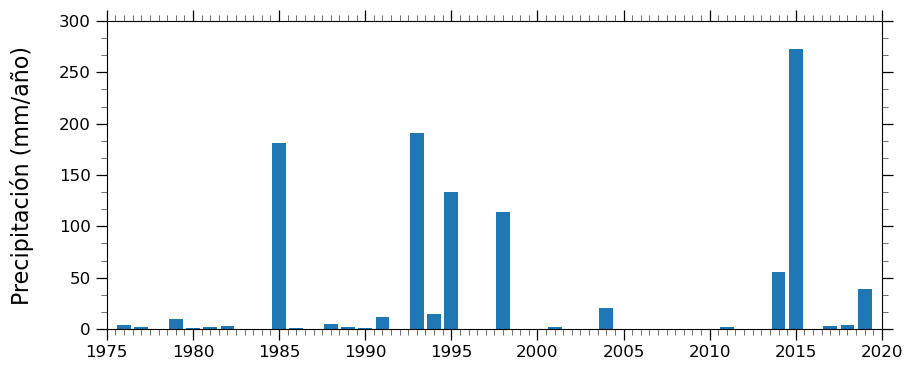

In [34]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
plt.bar(xtime, df_year['PRCP'].values)

# Ajustar las etiquetas en tiempo
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_ticks(majorTickPos)
ax.set_xticklabels(majorTickNames)

# Usamos la función geocat.viz.util para agregar líneas de menores y mayores.
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=10,
                         y_minor_per_major=3,
                         labelsize=12)

# Usamos la función geocat.viz.util para establecer parámetros de ejes sin llamar a varias funciones de matplotlib
gv.set_axes_limits_and_ticks(
    ax,
    ylim=(0, 300),
    xlim=(0, majorTickPos[-1]))

# agregar el título para el eje y. Además, damos algunos ajustes.
ax.set_ylabel('Precipitación (mm/año)', labelpad=18, fontsize=16)

### Figuras de Boxplot

In [35]:
df_sub.head()

,PRCP,TAVG,TMIN,TMAX
DATE,,,,
1975-01-31,0.0,21.472727,18.285714,26.000000
1975-02-28,NaN,22.421429,18.900000,26.937500
1975-03-31,NaN,22.355172,19.312500,27.277778
1975-04-30,NaN,21.080000,17.526316,25.722222
1975-05-31,NaN,18.630000,15.250000,22.916667


La forma rápida de hacer un boxplot es usando la función **`plt.boxplot`**. Recuerda que para usar esta función los datos no deben contener valores faltantes. ¿Por qué?

Text(0, 0.5, 'Temperatura (°C)')

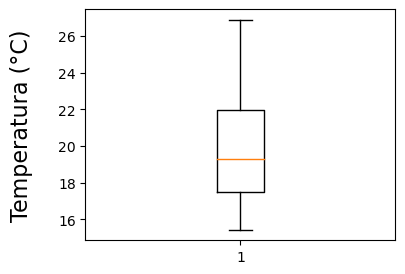

In [36]:
plt.figure(figsize=(4, 3))
plt.boxplot(df_sub['TAVG'].dropna())
plt.ylabel('Temperatura (°C)', labelpad=18, fontsize=16)


Ahora vamos hacer una figura boxplot donde los años deben ser las etiquetas.

Para ello, debemos generar una columna que contenga los años.

In [37]:
df_box = df_sub[['TAVG']]
df_box['Year'] = df_box.index.year
df_box

/tmp/ipykernel_11533/414400839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['Year'] = df_box.index.year


,TAVG,Year
DATE,,
1975-01-31,21.472727,1975
1975-02-28,22.421429,1975
1975-03-31,22.355172,1975
1975-04-30,21.080000,1975
1975-05-31,18.630000,1975
...,...,...
2020-08-31,16.138710,2020
2020-09-30,16.453333,2020
2020-10-31,17.716129,2020


In [38]:
df_box = df_sub[['TAVG']]
(df_sub.index.year)
df_box['Year'] = df_box.index.year
df_box = df_box.dropna()
df_box

/tmp/ipykernel_11533/2504014899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['Year'] = df_box.index.year


,TAVG,Year
DATE,,
1975-01-31,21.472727,1975
1975-02-28,22.421429,1975
1975-03-31,22.355172,1975
1975-04-30,21.080000,1975
1975-05-31,18.630000,1975
...,...,...
2020-08-31,16.138710,2020
2020-09-30,16.453333,2020
2020-10-31,17.716129,2020


El mensaje es una advertencia para usar mejor las funciones.

Ahora estamos listos para generar la nuestra figura de boxplot en función de los años.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(1, 0, '1975'),
  Text(2, 0, '1976'),
  Text(3, 0, '1977'),
  Text(4, 0, '1978'),
  Text(5, 0, '1979'),
  Text(6, 0, '1980'),
  Text(7, 0, '1981'),
  Text(8, 0, '1982'),
  Text(9, 0, '1983'),
  Text(10, 0, '1984'),
  Text(11, 0, '1985'),
  Text(12, 0, '1986'),
  Text(13, 0, '1987'),
  Text(14, 0, '1988'),
  Text(15, 0, '1989'),
  Text(16, 0, '1990'),
  Text(17, 0, '1991'),
  Text(18, 0, '1992'),
  Text(19, 0, '1993'),
  Text(20, 0, '1994'),
  Text(21, 0, '1995'),
  Text(22, 0, '1996'),
  Text(23, 0, '1997'),
  Text(24, 0, '1998'),
  Text(25, 0, '1999'),
  Text(26, 0, '2000'),
  Text(27, 0, '2001'),
  Text(28, 0, '2002'),
  Text(29, 0, '2003'),
  Text(30, 0, '2004'),
  Text(31, 0, '2005'),
  Text(32, 0, '2006'),
  Text(33, 0, '2007'),
  Text(34, 0, '2008'),
  Text(35, 0, '20

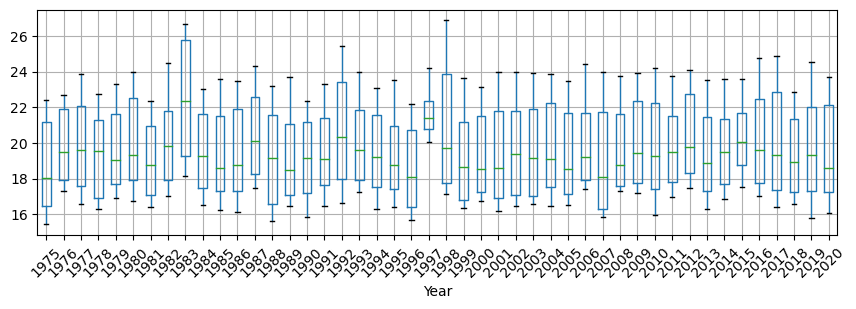

In [39]:
fig, ax = plt.subplots(figsize=(10,3))
df_box.boxplot(column=['TAVG'], by='Year', ax=ax)
plt.suptitle('')
plt.title('')
# Rota las etiquetas del eje x
plt.xticks(rotation=45)

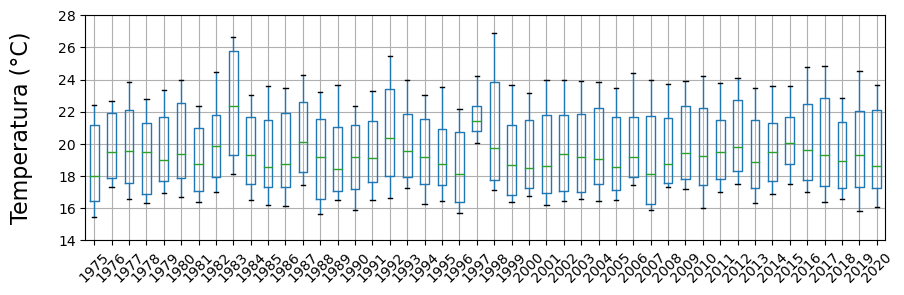

In [40]:
fig, ax = plt.subplots(figsize=(10,3))
df_box.boxplot(column=['TAVG'], by='Year', ax=ax)
plt.suptitle('')
plt.title('')

# Rota las etiquetas del eje x
plt.xticks(rotation=45)

# agregar el título para el eje y. Además, damos algunos ajustes.
plt.ylabel('Temperatura (°C)', labelpad=18, fontsize=16)

plt.xlabel('')
plt.ylim(14,28)

# Guardamos nuestra figura
fig.savefig('fig/TAVG_1975-2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight',
pad_inches = 0.1)

In [41]:
df_box = df_sub[['TAVG']]
df_box['Month'] = df_box.index.month
df_box = df_box.dropna()
df_box

/tmp/ipykernel_11533/3289691690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['Month'] = df_box.index.month


,TAVG,Month
DATE,,
1975-01-31,21.472727,1
1975-02-28,22.421429,2
1975-03-31,22.355172,3
1975-04-30,21.080000,4
1975-05-31,18.630000,5
...,...,...
2020-08-31,16.138710,8
2020-09-30,16.453333,9
2020-10-31,17.716129,10


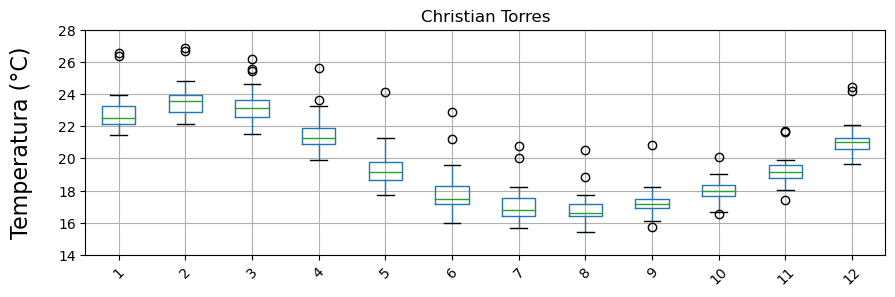

In [42]:
fig, ax = plt.subplots(figsize=(10,3))
df_box.boxplot(column=['TAVG'], by='Month', ax=ax)
plt.suptitle('')
plt.title('Christian Torres')

# Rota las etiquetas del eje x
plt.xticks(rotation=45)

# agregar el título para el eje y. Además, damos algunos ajustes.
plt.ylabel('Temperatura (°C)', labelpad=18, fontsize=16)

plt.xlabel('')
plt.ylim(14,28)

# Guardamos nuestra figura
fig.savefig('fig/TAVG_month_1975-2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight',
pad_inches = 0.1)

## Retornar al [indice](./../indice.md)